In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFECV
import optuna
from optuna import create_study

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('Dataset/processed_dataset.csv')
df.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Systolic BP,Diastolic BP
0,65,0,1,15,2.0,2,0,0,1,1,1,180.0,160.0,105.0,35.0,11.9,33.0,3.5,69.0,30.0,33.0,11800.0,60.0,30.0,5.0,4.0,1.0,1.2,8.2,7.2,0.2,6.6,2.7,3.2,0.840000,136.0,57,44,0,0,140,100
1,62,0,1,30,1.0,0,0,0,0,0,0,194.0,166.0,106.0,35.0,8.8,30.0,4.1,120.0,41.0,36.0,6000.0,70.6,23.6,4.6,1.6,0.0,1.3,5.0,3.0,2.0,5.0,1.2,3.8,0.750000,121.0,154,158,0,0,98,60
2,35,0,2,5,3.0,2,1,1,0,0,0,194.0,166.0,106.0,35.0,11.5,42.0,4.3,90.0,29.0,31.0,7000.0,60.0,28.0,5.0,2.0,1.0,1.8,0.4,1.0,2.0,7.4,4.2,2.8,1.680000,90.0,110,70,1,1,130,80
3,72,0,2,4,3.0,1,0,0,0,0,0,194.0,166.0,106.0,35.0,12.3,42.0,5.2,84.0,29.0,36.0,7000.0,60.0,44.0,3.0,1.0,1.0,2.4,0.5,1.0,2.0,5.3,4.2,3.5,0.750000,110.0,110,70,1,1,120,80
4,39,1,1,28,1.0,1,0,0,1,0,0,194.0,166.0,106.0,35.0,9.9,38.0,3.9,102.0,28.0,30.0,8200.0,72.0,12.0,6.0,4.0,2.0,1.1,4.6,2.3,2.3,4.6,1.8,2.8,0.814046,196.0,126,98,0,0,102,60


In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
df.shape

(935, 42)

In [6]:
df1=df.copy()
df1.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Systolic BP,Diastolic BP
0,65,0,1,15,2.0,2,0,0,1,1,1,180.0,160.0,105.0,35.0,11.9,33.0,3.5,69.0,30.0,33.0,11800.0,60.0,30.0,5.0,4.0,1.0,1.2,8.2,7.2,0.2,6.6,2.7,3.2,0.840000,136.0,57,44,0,0,140,100
1,62,0,1,30,1.0,0,0,0,0,0,0,194.0,166.0,106.0,35.0,8.8,30.0,4.1,120.0,41.0,36.0,6000.0,70.6,23.6,4.6,1.6,0.0,1.3,5.0,3.0,2.0,5.0,1.2,3.8,0.750000,121.0,154,158,0,0,98,60
2,35,0,2,5,3.0,2,1,1,0,0,0,194.0,166.0,106.0,35.0,11.5,42.0,4.3,90.0,29.0,31.0,7000.0,60.0,28.0,5.0,2.0,1.0,1.8,0.4,1.0,2.0,7.4,4.2,2.8,1.680000,90.0,110,70,1,1,130,80
3,72,0,2,4,3.0,1,0,0,0,0,0,194.0,166.0,106.0,35.0,12.3,42.0,5.2,84.0,29.0,36.0,7000.0,60.0,44.0,3.0,1.0,1.0,2.4,0.5,1.0,2.0,5.3,4.2,3.5,0.750000,110.0,110,70,1,1,120,80
4,39,1,1,28,1.0,1,0,0,1,0,0,194.0,166.0,106.0,35.0,9.9,38.0,3.9,102.0,28.0,30.0,8200.0,72.0,12.0,6.0,4.0,2.0,1.1,4.6,2.3,2.3,4.6,1.8,2.8,0.814046,196.0,126,98,0,0,102,60


In [7]:
df["AST_ALT_Ratio"] = df["SGOT/AST (U/L)"] / df["SGPT/ALT (U/L)"]
df["Direct_Total_Bilirubin_Ratio"] = df["Direct (mg/dl)"] / df["Total Bilirubin (mg/dl)"]
df["TG_HDL_Ratio"] = df["TG"] / df["HDL"]
df["LDL_HDL_Ratio"] = df["LDL"] / df["HDL"]
df["RDW"] = df["MCV (femtoliters/cell)"] / df["MCH (picograms/cell)"]

df["Lifetime_Alcohol_Consumption"] = df["Duration of alcohol consumption(years)"] * df["Quantity of alcohol consumption (quarters/day)"]
df["Alcohol_Consumption_Intensity"] = df["Quantity of alcohol consumption (quarters/day)"] / df["Duration of alcohol consumption(years)"]

In [8]:
df["Liver_Stress_Score"] = ((df["AST_ALT_Ratio"] > 2) | (df["Total Bilirubin (mg/dl)"] > 2) | (df["Albumin (g/dl)"] < 3)).astype(int)
df["Metabolic_Syndrome_Indicator"] = ((df["TG_HDL_Ratio"] > 4) | (df["LDL_HDL_Ratio"] > 3.5) | (df["Obesity"] == 1)).astype(int)

In [9]:
df["Age_Alcohol_Interaction"] = df["Age"] * df["Duration of alcohol consumption(years)"]
df["FamilyHistory_Diabetes"] = df["Family history of cirrhosis/ hereditary"] * df["Diabetes Result"]
df["Obesity_LDL"] = df["Obesity"] * df["LDL"]
df["Obesity_TG"] = df["Obesity"] * df["TG"]

In [10]:
def categorize_age(age):
    if age < 40:
        return "Young"
    elif 40 <= age <= 60:
        return "Middle_Aged"
    else:
        return "Elderly"

In [11]:
df["Age_Category"] = df["Age"].apply(categorize_age)
df["Alcohol_Category"] = pd.cut(df["Quantity of alcohol consumption (quarters/day)"], bins=[0, 1, 2, 3, np.inf], labels=["Non-Drinker", "Light", "Moderate", "Heavy"])
df["BP_Category"] = pd.cut(df["Systolic BP"], bins=[0, 120, 140, np.inf], labels=["Normal", "Prehypertension", "Hypertension"])

In [12]:
df = pd.get_dummies(df, columns=["Age_Category", "Alcohol_Category", "BP_Category"], drop_first=True)

In [13]:
correlation_matrix = df.corr()
high_correlation = correlation_matrix["Predicted Value(Out Come-Patient suffering from liver cirrosis or not)"].abs().sort_values(ascending=False)
print(high_correlation.head(15)) 

Predicted Value(Out Come-Patient suffering from liver cirrosis or not)    1.000000
Liver_Stress_Score                                                        0.657317
USG Abdomen (diffuse liver or not)                                        0.657317
Alcohol_Consumption_Intensity                                             0.588589
Direct_Total_Bilirubin_Ratio                                              0.339103
Total Bilirubin (mg/dl)                                                   0.329520
A/G Ratio                                                                 0.294628
RBC (million cells/microliter)                                            0.272590
Alcohol_Category_Moderate                                                 0.229333
Duration of alcohol consumption(years)                                    0.228591
Hepatitis C infection                                                     0.211884
Hepatitis B infection                                                     0.195752
Diab

In [14]:
scaler = StandardScaler()
numeric_cols = ["AST_ALT_Ratio", "TG_HDL_Ratio", "LDL_HDL_Ratio", "RDW", "Lifetime_Alcohol_Consumption", "Alcohol_Consumption_Intensity"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [15]:
df.drop([
    "SGOT/AST (U/L)", 
    "SGPT/ALT (U/L)", 
    "Total Bilirubin (mg/dl)", 
    "Direct (mg/dl)", 
    "TG", 
    "HDL",  
    "Duration of alcohol consumption(years)", 
    "Quantity of alcohol consumption (quarters/day)",  
    "AL.Phosphatase (U/L)", 
    "LDL", 
    "Age", 
    "Systolic BP", 
    "Diastolic BP",
    "Hepatitis B infection",  
    "Diabetes Result",   
    "Age_Alcohol_Interaction"
], axis=1, inplace=True)

In [16]:
df.shape

(935, 46)

In [17]:
X = df.drop(columns=["Predicted Value(Out Come-Patient suffering from liver cirrosis or not)"])
y = df["Predicted Value(Out Come-Patient suffering from liver cirrosis or not)"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    print(f"\n{name} Performance:\n", classification_report(y_test, y_pred))



Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00         7

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374


Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       367
           1       1.00      0.57      0.73         7

    accuracy                           0.99       374
   macro avg       1.00      0.79      0.86       374
weighted avg       0.99      0.99      0.99       374


Random Forest Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00         7

    accuracy                           1.00       374
   macro avg       1.00      1.00  

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



CatBoost Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      0.86      0.92         7

    accuracy                           1.00       374
   macro avg       1.00      0.93      0.96       374
weighted avg       1.00      1.00      1.00       374


SVM Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      0.86      0.92         7

    accuracy                           1.00       374
   macro avg       1.00      0.93      0.96       374
weighted avg       1.00      1.00      1.00       374


K-Nearest Neighbors Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00         7

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       

In [22]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by="F1 Score", ascending=False))


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  1.000000        1.0  1.000000  1.000000
Random Forest        1.000000        1.0  1.000000  1.000000
XGBoost              1.000000        1.0  1.000000  1.000000
K-Nearest Neighbors  1.000000        1.0  1.000000  1.000000
CatBoost             0.997326        1.0  0.857143  0.923077
SVM                  0.997326        1.0  0.857143  0.923077
Decision Tree        0.991979        1.0  0.571429  0.727273
Gradient Boosting    0.991979        1.0  0.571429  0.727273


### Logistic Regression

In [23]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


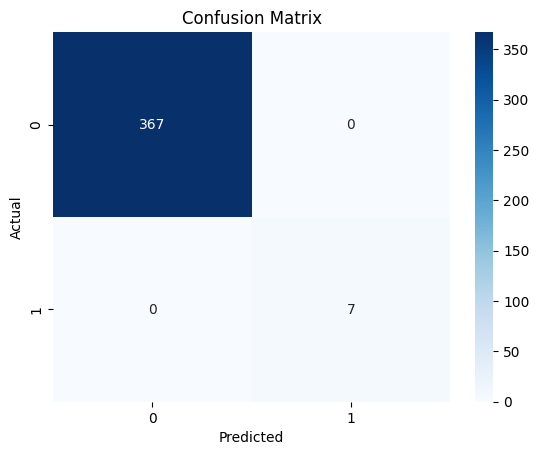

In [24]:
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [25]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "criterion": ["gini", "entropy"]  
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Accuracy: 0.9919786096256684
Precision: 1.0
Recall: 0.5714285714285714
F1 Score: 0.7272727272727273
ROC-AUC Score: 0.7857142857142857


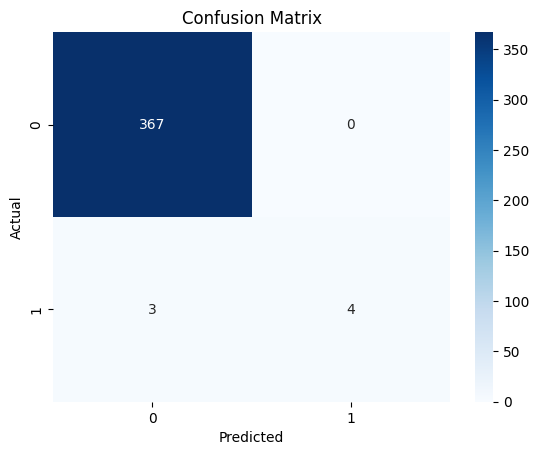

In [26]:
y_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

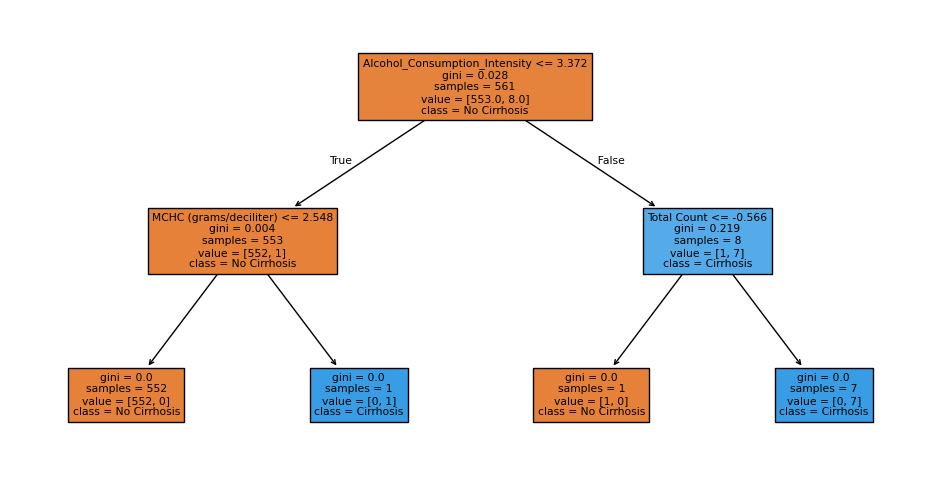

In [27]:
plt.figure(figsize=(12, 6))
plot_tree(best_dt, feature_names=X.columns, class_names=["No Cirrhosis", "Cirrhosis"], filled=True, max_depth=3)
plt.show()

### Random Forest

In [28]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],  # Features per split
    'bootstrap': [True, False]  # Bootstrap sampling
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, 
    n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Tuned Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00         7

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

ROC-AUC Score: 1.0


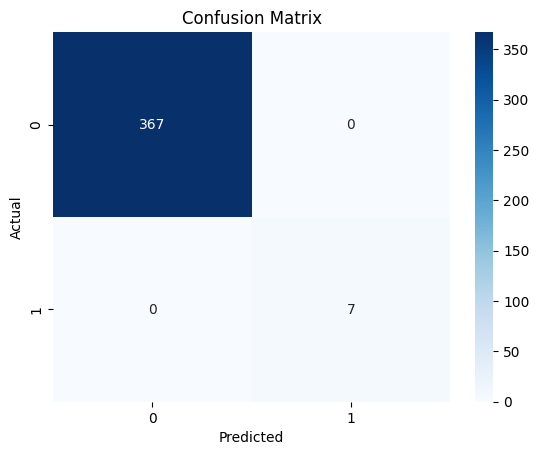

In [29]:
y_pred_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### XGBoost

In [30]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
selector = RFECV(model, step=1, cv=5, scoring="accuracy")
selector.fit(X_train, y_train)

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:35] WARN

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='logloss',
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...),
      scoring='accuracy')

In [31]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Selected {X_train_selected.shape[1]} best features from {X_train.shape[1]}")

Selected 2 best features from 45


In [32]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 10),
    }
    
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
    score = cross_val_score(model, X_train_selected, y_train, cv=5, scoring="accuracy").mean()
    
    return score

In [33]:
study = create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-03-11 02:48:39,396] A new study created in memory with name: no-name-22180303-2f09-41fa-ac0a-7cb37f3b4c40
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_U

In [34]:
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.013572583942807623, 'subsample': 0.6640298422322537, 'colsample_bytree': 0.8468048504259367, 'gamma': 2.3610269289722052, 'min_child_weight': 6, 'reg_lambda': 7.916164895022814, 'reg_alpha': 2.6649158858930284}


In [35]:
best_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss")
best_xgb.fit(X_train_selected, y_train)

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8468048504259367, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=2.3610269289722052, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013572583942807623,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred = best_xgb.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9813
F1 Score: 0.0000
AUC-ROC Score: 0.5000
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       367
           1       0.00      0.00      0.00         7

    accuracy                           0.98       374
   macro avg       0.49      0.50      0.50       374
weighted avg       0.96      0.98      0.97       374



b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


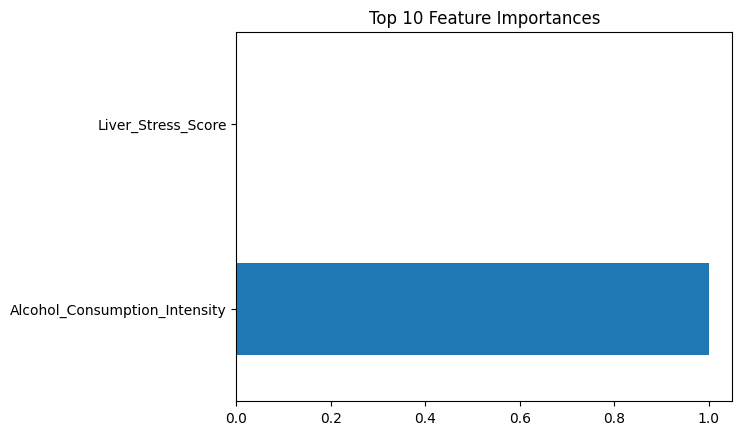

In [38]:
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns[selector.support_])
feat_importances.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances")
plt.show()

### SVC

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
svc = SVC(probability=True, random_state=42)

In [41]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
}

In [42]:
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='roc_auc', verbose=2)

In [43]:
best_svc = grid_search.best_estimator_

In [44]:
y_pred = best_svc.predict(X_test_scaled)
y_prob = best_svc.predict_proba(X_test_scaled)[:, 1]

In [45]:
print("Best SVC Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_prob))

Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00         7

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374


AUC-ROC Score: 1.0


### KNN

In [46]:
param_grid = {"n_neighbors": np.arange(1, 50, 2), "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [47]:
best_knn = grid_search.best_estimator_
print("Best K:", grid_search.best_params_["n_neighbors"])
print("Best Weights:", grid_search.best_params_["weights"])

Best K: 1
Best Weights: uniform


In [48]:
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
y_pred = best_knn.predict(X_test)

In [50]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00         7

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374


 Confusion Matrix:
 [[367   0]
 [  0   7]]


### Naive Bayes

In [53]:
gnb= GaussianNB()

In [58]:
gnb.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = gnb.predict(X_test)

In [60]:
scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring="roc_auc")


In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]))

Accuracy: 0.9973262032085561
Precision: 1.0
Recall: 0.8571428571428571
F1 Score: 0.9230769230769231
ROC-AUC Score: 0.9285714285714286
